In [1]:
! pip install wget gensim

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 3.4 MB/s eta 0:00:0000:0100:01m
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=5ef6aeb2a92881d6e01ce3e22a37e00171d9e4dc2c813513edcef0657684e4c9
  Stored in directory: /Users/anwasty/Library/Caches/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [128]:
import zipfile
import wget
import gensim
import os
import numpy as np
import scipy
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
model_url = 'http://vectors.nlpl.eu/repository/20/204.zip'

zip_file_path = wget.download(model_url)

with zipfile.ZipFile(zip_file_path, 'r') as archive:
    archive.extractall()

100% [................................................] 2562993511 / 2562993511

In [32]:
model_path = 'model.bin' 

model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

In [132]:
verbs_nouns = []

with open('HW2_change.txt', 'r', encoding='utf-8') as f:
    for line in f:
        verb, noun = line.strip().split()
        verbs = verb + '_VERB'
        nouns = noun + '_NOUN'
        verbs_nouns.append((verbs, nouns))
        
compositions = {}
for verb, noun in verbs_nouns:
    if verb in model and noun in model:
        verb_vector = model[verb]
        noun_vector = model[noun]
        composition_vector = verb_vector + noun_vector  
        compositions[verb + ' ' + noun] = composition_vector


In [133]:
vector_matrix = np.array(list(compositions.values()))

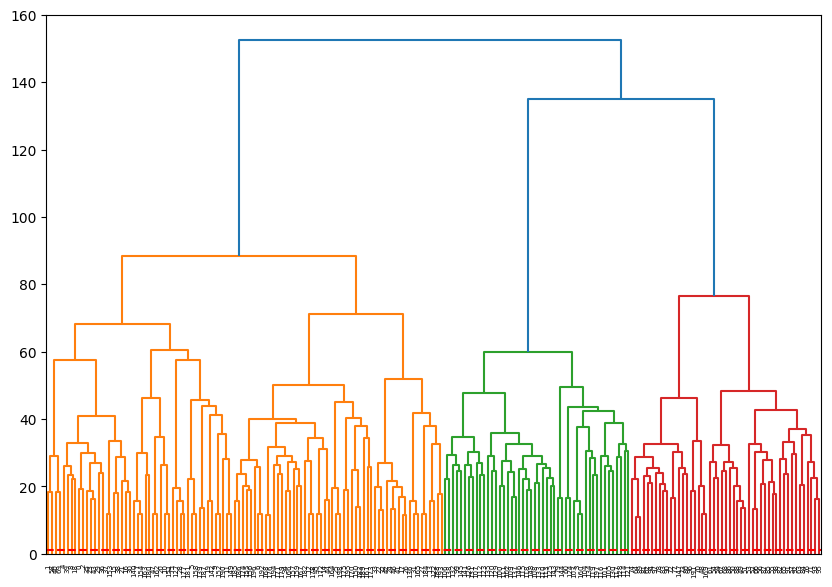

Кластеры: 26


In [162]:
# иерархическая кластеризация
t = 1.13 
Z = linkage(vector_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=t, color='r', linestyle='--')
plt.show()

# определяем кластеры, настроив t
clusters_hier = fcluster(Z, t=t)
print("Кластеры:", len(set(clusters_hier)))

оптимальное значение t для не слишком большого, но и не слишком маленького значения кластеров.

In [163]:
results_hier = {}

for cluster_i in set(clusters_hier):
    cluster_indices = np.where(clusters_hier == cluster_i)[0]
    
    if len(cluster_indices) < 3:
        continue
    
    cluster_vectors = vector_matrix[cluster_indices]
    center = np.mean(cluster_vectors, axis=0)
    similarities = cosine_similarity([center], cluster_vectors)[0]
    closest_indices = cluster_indices[np.argsort(similarities)[-3:]]

    results_hier[cluster_i] = [list(compositions.keys())[i] for i in closest_indices]

for result in results_hier.values():
    print(result)

['сменить_VERB староста_NOUN', 'сменить_VERB посадник_NOUN', 'сменить_VERB горчаков_NOUN']
['сменить_VERB сд_NOUN', 'сменить_VERB караул_NOUN', 'сменить_VERB дислокация_NOUN']
['поменять_VERB название_NOUN', 'поменять_VERB отчество_NOUN', 'поменять_VERB фамилия_NOUN']
['поменять_VERB вывеска_NOUN', 'поменять_VERB ванная_NOUN', 'поменять_VERB лампочка_NOUN']
['сменить_VERB одежда_NOUN', 'сменить_VERB рубашка_NOUN', 'сменить_VERB пиджак_NOUN']
['изменить_VERB поза_NOUN', 'сменить_VERB поза_NOUN', 'поменять_VERB поза_NOUN']
['изменить_VERB условие_NOUN', 'изменить_VERB ситуация_NOUN', 'изменить_VERB положение_NOUN']
['изменить_VERB соотношение_NOUN', 'изменить_VERB форма_NOUN', 'изменить_VERB структура_NOUN']
['изменить_VERB отношение_NOUN', 'изменить_VERB характер_NOUN', 'изменить_VERB поведение_NOUN']
['изменить_VERB внешность_NOUN', 'изменить_VERB взгляд_NOUN', 'изменить_VERB убеждение_NOUN']
['поменять_VERB стратегия_NOUN', 'поменять_VERB тактика_NOUN', 'изменить_VERB тактика_NOUN']
[

In [164]:
# K-средних
kmeans = KMeans(n_clusters=10).fit(vector_matrix)
labels = kmeans.labels_
labels

array([7, 7, 7, 7, 7, 7, 1, 4, 7, 7, 4, 7, 7, 7, 7, 7, 7, 1, 7, 8, 4, 7,
       1, 7, 7, 7, 1, 1, 4, 7, 7, 7, 1, 1, 1, 7, 7, 7, 7, 7, 7, 1, 1, 7,
       7, 7, 7, 4, 5, 9, 9, 9, 9, 0, 9, 9, 0, 9, 0, 9, 9, 0, 6, 0, 6, 6,
       9, 9, 9, 0, 6, 9, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 0,
       9, 6, 6, 0, 9, 9, 6, 9, 6, 6, 9, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2,
       8, 2, 2, 8, 2, 2, 2, 2, 4, 2, 8, 2, 2, 8, 8, 2, 2, 5, 3, 4, 1, 5,
       4, 1, 5, 5, 4, 5, 2, 3, 4, 4, 3, 5, 5, 5, 3, 5, 3, 5, 5, 5, 1, 3,
       3, 4, 5, 5, 4, 4, 5, 3, 1, 5, 5, 4, 5, 5, 5, 5, 1, 5, 3, 3, 1, 2,
       3], dtype=int32)

In [165]:
results_k = {}

for label in set(labels):
    cluster_indices = np.where(labels == label)[0]
    
    if len(cluster_indices) < 3:
        continue
    
    cluster_vectors = vector_matrix[cluster_indices]
    center = np.mean(cluster_vectors, axis=0)
    similarities = cosine_similarity([center], cluster_vectors)[0]
    closest_indices = cluster_indices[np.argsort(similarities)[-3:]] 

    results_k[label] = [list(compositions.keys())[i] for i in closest_indices]

for result in results_k.values():
    print(result)

['заменить_VERB должность_NOUN', 'заменить_VERB пост_NOUN', 'заменить_VERB цифра_NOUN']
['сменить_VERB наволочка_NOUN', 'сменить_VERB белье_NOUN', 'сменить_VERB одежда_NOUN']
['изменить_VERB образ_NOUN', 'изменить_VERB формулировка_NOUN', 'изменить_VERB убеждение_NOUN']
['поменять_VERB доллар_NOUN', 'поменять_VERB минус_NOUN', 'поменять_VERB бакс_NOUN']
['сменить_VERB паспорт_NOUN', 'поменять_VERB отчество_NOUN', 'поменять_VERB фамилия_NOUN']
['поменять_VERB проводка_NOUN', 'поменять_VERB колесо_NOUN', 'поменять_VERB лампочка_NOUN']
['заменить_VERB лампа_NOUN', 'заменить_VERB двигатель_NOUN', 'заменить_VERB прибор_NOUN']
['сменить_VERB караул_NOUN', 'сменить_VERB амплуа_NOUN', 'сменить_VERB горчаков_NOUN']
['изменить_VERB настроение_NOUN', 'изменить_VERB ситуация_NOUN', 'изменить_VERB обстановка_NOUN']
['заменить_VERB казнь_NOUN', 'заменить_VERB диктатура_NOUN', 'заменить_VERB повешение_NOUN']
